In [1]:
from __future__ import print_function
from fenics import *
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

we think about the error of this function in finite element space.
\begin{equation*}
    u(x,y) = \sum_{j \geq 1} \frac{y_j}{j^\alpha} sin(j\pi x)
\end{equation*}
where $x\in[0,1] = D$, $y\sim u(-1,1)$, $\alpha >1/2$(for the convergence)

For the computation, instead of infinite sum, we consider finite sum. Furthemore, we will project it into finite element space. That is,
\begin{equation*}
u(x,y) \approx \sum_{j \geq 1}^K \frac{y_j}{j^\alpha} sin(j\pi x)  \approx u_h(x,y) = \sum_{i=1}^{N_h} v_i(y) \phi_i(x) 
\end{equation*}

In [ ]:
"""
Test problem is sum of infinite series.

  u = np.sum(w_j/j^alpha*sin(j*pi*x))
"""

First, we will change mesh size h and estimate the error below by monte carlo simulation.

\begin{equation*}
E[||\sum_{j \geq 1}^K \frac{y_j}{j^\alpha} sin(j\pi x)  - u_h(x,y)||^2_V]
\end{equation*}

In [2]:
#smootheness
alpha = 0.3
#order of summation
K = 2
#degree of polynomial
p=1
# The number of meshes
M = 1000
#length of interval
h = 2/M
# The number of sampling
N = 100

def error(r=p,M=M,N=N):
    #random vector
    # y = np.random.uniform(low=-1.0, high=1.0, size=(N,K))
    y = np.random.uniform(low=-1.0, high=1.0, size=(K))
    
    mesh = IntervalMesh(M,-1,1)
    
    V = FunctionSpace(mesh,"P", r)
    
    u = Function(V)

    
    u_j_list=[]

    str = "y[0]/pow(1,alpha)*sin(1*pi*x[0])"
    for j in range(1,K):
        str += f"　+ y[{j}]/pow({j},alpha)*sin({j+1}*pi*x[0])"

    print(str)
    expr = Expression(str, degree=r+3,y=Constant(y), alpha=alpha)

    u_h = interpolate(expr, V)

    err = errornorm(expr, u_h)
    print(err)
    
    
    # for i in range(N):
    #     for j in range(1,K+1):
    #         u_j.j = j
    #         u_j.y_j = y[i][j-1]
    #         u.vector()[:] += ( interpolate(u_j, V) ).vector()
    # u.vector()[:] /= N
        
    # zero = Constant(0.0)
    # zero = interpolate(zero,V)
    # error_L2 = errornorm(u,zero, 'L2')
    
    # return error_L2 * error_L2

    


In [3]:
error(r=1, M=1000)

y[0]/pow(1,alpha)*sin(1*pi*x[0])　+ y[1]/pow(1,alpha)*sin(2*pi*x[0])
7.645526944496423e-06


If we apply KL exapnsion to u_h,

\begin{equation*}
u_h(x,y) \approx u_N = \sum_{n=1}^N \sqrt{\lambda_n} a_n(y) b_n(x)
\end{equation*}
The error can be caluclated in a following way.
\begin{equation*}
E[||u_h(x,y) - u_N||_{L2}^2 = \sum_{n=N+1}^\infty \lambda_n
\end{equation*}
$\lambda_n$ is defined in a following eigen value problem.
\begin{equation*}
\int_0^1 c(x_1,x_2)b_n(x_2)dx_2 = \lambda_n b_n(x_1)
\end{equation*}
where $c(x_1,x_2)=E[(u_h(x_1,y)-E[u_h(x_1)])(u_h(x_2,y)-E[u_h(x_2)])]$.

Tensor product $C_h = E[u_h(y) \otimes u_h(y)] = \sum _{i,j=1}^{N_h} E[v_i(y)v_j(y)]\phi_i\otimes\phi_j$\
$\langle b_m,C_h b_m \rangle = \lambda_m $\
Define components of matrix C as $C_{n,m} = \langle \phi_n, C_h \phi_m \rangle _{V_h} =  \sum _{i,j=1}^{N_h} E[v_i(y)v_j(y)]\langle \phi_n, \phi_i \rangle _{V_h}\langle \phi_j, \phi_m \rangle _{V_h}$\
Then $C = E[(Mv(y)(Mv(y)^T] = ME[v(y)v(y)^T]M^T$\
We diagonize C and get $\lambda$.

In [33]:
def lambda_matrix(r=10,M=30,N=100):
    #random vector
    y = np.random.uniform(low=-1.0, high=1.0, size=(N,K))
    
    mesh = IntervalMesh(M,-1,1)
    
    V = FunctionSpace(mesh,"P", r)
    
    u = Function(V)

    u_j = Expression("y_j /pow(j,alpha)*sin(j*pi*x[0])",degree=r, y_j=0.0, j = 0.0,alpha = alpha )
    
    u_matrix=np.zeros(K,K)
    for i in range(N):
        for j in range(1,K+1):
            u_j.j = j
            u_j.y_j = y[i][j-1]
            u.vector()[:] += ( interpolate(u_j, V) ).vector()
        u_matrix += np.mutmull(np.array(u.vector()).reshape(K,1),np.array(u.vector()).reshape(1,K))
    u.matrix /= N




    
   
    
    return u_matrix

    


In [34]:
lambda_matrix()

TypeError: Cannot interpret '11' as a data type

First, we will change mesh size h and estimate the error below by monte carlo simulation.

\begin{equation*}
E[\sum_{j \geq 1}^K \frac{y_j}{j^\alpha} sin(j\pi x)  - u_h(x,y)]
\end{equation*}

In [49]:
error(R = 100,r=10,M = 10,N = 1)

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.


43.09798486481928

In [ ]:
# changing the number of sample points

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warnin

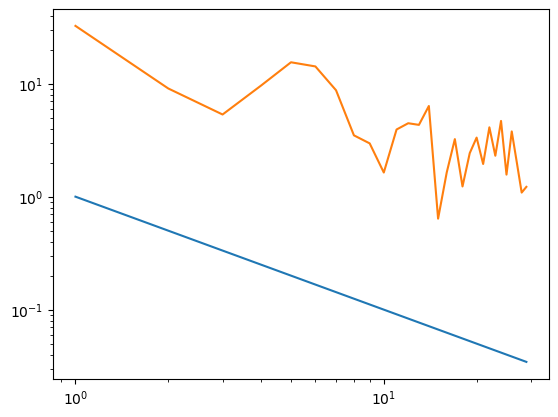

In [47]:
N_list=[i for i in range(1,30)]
N_decay=[1/i for i in range(1,30)]
error_list=[error(R = 100,r=10,M = 10,N = i) for i in N_list]
print(error_list)
plt.loglog(N_list,N_decay)
plt.loglog(N_list,error_list)
plt.show()

In [ ]:
# changing the number of meshes

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warnin

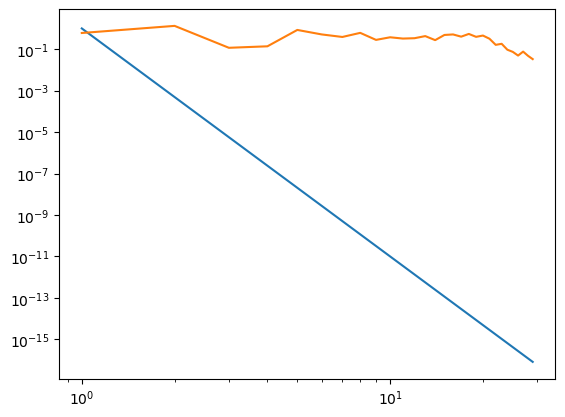

In [59]:
M_list=[i for i in range(1,30)]
M_decay=[(1/i)**(r+1) for i in M_list]
error_list=[error(R =100,r=10,M=i,N=100) for i in M_list]
print(error_list)
plt.loglog(M_list,M_decay)
plt.loglog(M_list,error_list)
plt.show()

In [ ]:
# changing the order of truncation

*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warning: Degree of exact solution may be inadequate for accurate result in errornorm.
*** Warnin

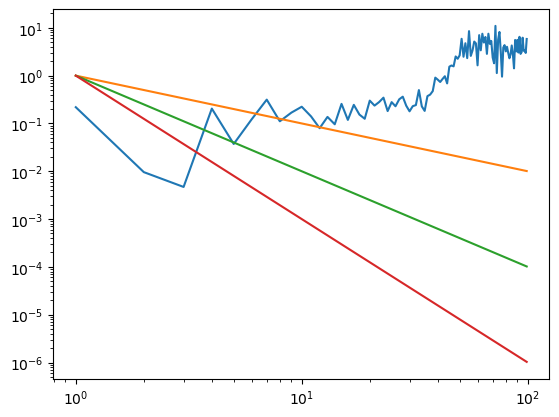

In [58]:
R_list=[i for i in range(1,100)]
decay1=[1/i for i in R_list]
decay2=[1/i**2 for i in R_list]
decay3=[1/i**3 for i in R_list]
error_list=[error(R = i,r=10,M = 10,N = 10) for i in R_list]
print(error_list)
plt.loglog(R_list,error_list)
plt.loglog(R_list,decay1)
plt.loglog(R_list,decay2)
plt.loglog(R_list,decay3)
plt.show()